# Missing Values

In [1]:
import numpy as np
import pandas as pd

In [71]:
df = pd.DataFrame(zip(
    pd.to_datetime(pd.Series(['1/18/1995', '5/12/1984', '7/23/2012'])),
    ['Tom', 'Nick', '?'],
    [25, 36, 8],
    [True, True, False],
    [1.8, 11,62, 1.02]
), columns=['date', 'name', 'age', 'graduated', 'height'])
df

,date,name,age,graduated,height
0,1995-01-18,Tom,25,True,1.8
1,1984-05-12,Nick,36,True,11.0
2,2012-07-23,?,8,False,62.0


In [4]:
df.dtypes

date         datetime64[ns]
name                 object
age                   int64
graduated              bool
height              float64
dtype: object

In [14]:
df.loc[2] = np.nan  # nan is float
df.dtypes

date         datetime64[ns]
name                 object
age                 float64
graduated           float64
height              float64
dtype: object

In [12]:
pd.Series([1, 2, np.nan, 4], dtype=pd.Int64Dtype())

0       1
1       2
2    <NA>
3       4
dtype: Int64

# Detecting if is NaN

In [16]:
df.isnull()

,date,name,age,graduated,height
0,False,False,False,False,False
1,False,False,False,False,False
2,True,True,True,True,True


In [17]:
df.isna()

,date,name,age,graduated,height
0,False,False,False,False,False
1,False,False,False,False,False
2,True,True,True,True,True


In [18]:
df.notna()

,date,name,age,graduated,height
0,True,True,True,True,True
1,True,True,True,True,True
2,False,False,False,False,False


# Replace unrealted values

In [72]:
df = pd.read_csv('team.csv', na_values=['?', '_'])  # or df.replace({'': np.nan})
df.drop(['team'], axis=1, inplace=True)
df

,name,gender,start_date,salary,bonus,senior_management
0,Thomas,Male,3/31/1996,61933.0,4.170,True
1,Louise,Female,8/12/1980,63241.0,NaN,True
2,NaN,Male,6/14/2012,125792.0,5.042,NaN
3,NaN,Male,8/21/1998,122340.0,6.417,NaN
4,James,NaN,1/26/2005,128771.0,8.309,False
5,NaN,NaN,NaN,NaN,NaN,NaN
6,Christopher,Male,4/22/2000,37919.0,NaN,False
7,NaN,Female,10/3/1990,132373.0,11.449,NaN
8,Jonathan,Male,7/17/2009,130581.0,NaN,True
9,Michael,Male,1/24/2002,43586.0,12.659,False


In [85]:
df[6, 'salary'] = np.nan
df

,name,gender,start_date,salary,bonus,senior_management,"(6, salary)"
0,Thomas,Male,3/31/1996,61933.0,4.170,True,NaN
1,Louise,Female,8/12/1980,63241.0,NaN,True,NaN
2,NaN,Male,6/14/2012,125792.0,5.042,NaN,NaN
3,NaN,Male,8/21/1998,122340.0,6.417,NaN,NaN
4,James,NaN,1/26/2005,128771.0,8.309,False,NaN
6,Christopher,Male,4/22/2000,NaN,NaN,False,NaN
7,NaN,Female,10/3/1990,132373.0,11.449,NaN,NaN
8,Jonathan,Male,7/17/2009,130581.0,NaN,True,NaN
9,Michael,Male,1/24/2002,43586.0,12.659,False,NaN
10,Jeremy,Male,6/14/1988,129460.0,13.657,True,NaN


# Handling missing values

## a. Removing data

In [87]:
df.dropna(axis=0, how='all', inplace=True)  # Removes 5th row
df

,name,gender,start_date,salary,bonus,senior_management,"(6, salary)"
0,Thomas,Male,3/31/1996,61933.0,4.170,True,NaN
1,Louise,Female,8/12/1980,63241.0,NaN,True,NaN
2,NaN,Male,6/14/2012,125792.0,5.042,NaN,NaN
3,NaN,Male,8/21/1998,122340.0,6.417,NaN,NaN
4,James,NaN,1/26/2005,128771.0,8.309,False,NaN
6,Christopher,Male,4/22/2000,NaN,NaN,False,NaN
7,NaN,Female,10/3/1990,132373.0,11.449,NaN,NaN
8,Jonathan,Male,7/17/2009,130581.0,NaN,True,NaN
9,Michael,Male,1/24/2002,43586.0,12.659,False,NaN
10,Jeremy,Male,6/14/1988,129460.0,13.657,True,NaN


In [88]:
df.dropna(axis=0, how='any')

,name,gender,start_date,salary,bonus,senior_management,"(6, salary)"


In [89]:
df.dropna(axis=0, thresh=2)

,name,gender,start_date,salary,bonus,senior_management,"(6, salary)"
0,Thomas,Male,3/31/1996,61933.0,4.170,True,NaN
1,Louise,Female,8/12/1980,63241.0,NaN,True,NaN
2,NaN,Male,6/14/2012,125792.0,5.042,NaN,NaN
3,NaN,Male,8/21/1998,122340.0,6.417,NaN,NaN
4,James,NaN,1/26/2005,128771.0,8.309,False,NaN
6,Christopher,Male,4/22/2000,NaN,NaN,False,NaN
7,NaN,Female,10/3/1990,132373.0,11.449,NaN,NaN
8,Jonathan,Male,7/17/2009,130581.0,NaN,True,NaN
9,Michael,Male,1/24/2002,43586.0,12.659,False,NaN
10,Jeremy,Male,6/14/1988,129460.0,13.657,True,NaN


In [90]:
df.isnull().sum()*100/df.shape[0]

name                  30.0
gender                10.0
start_date             0.0
salary                10.0
bonus                 30.0
senior_management     30.0
(6, salary)          100.0
dtype: float64

## b. Date imputation

### b.1) Logical rules

In [91]:
data = pd.DataFrame({
    'name': ['x', 'y', 'z'],
    'id': [810195120, 810198112, 810199450],
    'year': [95, 98, np.nan]
})
data

,name,id,year
0,x,810195120,95.0
1,y,810198112,98.0
2,z,810199450,NaN


It should be 99 because of the 5th and 6th value

### b.2) Imputation using a constant value

In [92]:
df.fillna(0)

,name,gender,start_date,salary,bonus,senior_management,"(6, salary)"
0,Thomas,Male,3/31/1996,61933.0,4.170,True,0.0
1,Louise,Female,8/12/1980,63241.0,0.000,True,0.0
2,0,Male,6/14/2012,125792.0,5.042,0,0.0
3,0,Male,8/21/1998,122340.0,6.417,0,0.0
4,James,0,1/26/2005,128771.0,8.309,False,0.0
6,Christopher,Male,4/22/2000,0.0,0.000,False,0.0
7,0,Female,10/3/1990,132373.0,11.449,0,0.0
8,Jonathan,Male,7/17/2009,130581.0,0.000,True,0.0
9,Michael,Male,1/24/2002,43586.0,12.659,False,0.0
10,Jeremy,Male,6/14/1988,129460.0,13.657,True,0.0


### b.3) Imputation using mean/median values

In [93]:
df.salary

0      61933.0
1      63241.0
2     125792.0
3     122340.0
4     128771.0
6          NaN
7     132373.0
8     130581.0
9      43586.0
10    129460.0
Name: salary, dtype: float64

In [94]:
df.salary.fillna(df.salary.median())

0      61933.0
1      63241.0
2     125792.0
3     122340.0
4     128771.0
6     125792.0
7     132373.0
8     130581.0
9      43586.0
10    129460.0
Name: salary, dtype: float64

In [95]:
df.fillna(method='ffill')

,name,gender,start_date,salary,bonus,senior_management,"(6, salary)"
0,Thomas,Male,3/31/1996,61933.0,4.170,True,NaN
1,Louise,Female,8/12/1980,63241.0,4.170,True,NaN
2,Louise,Male,6/14/2012,125792.0,5.042,True,NaN
3,Louise,Male,8/21/1998,122340.0,6.417,True,NaN
4,James,Male,1/26/2005,128771.0,8.309,False,NaN
6,Christopher,Male,4/22/2000,128771.0,8.309,False,NaN
7,Christopher,Female,10/3/1990,132373.0,11.449,False,NaN
8,Jonathan,Male,7/17/2009,130581.0,11.449,True,NaN
9,Michael,Male,1/24/2002,43586.0,12.659,False,NaN
10,Jeremy,Male,6/14/1988,129460.0,13.657,True,NaN


### b.4) Interpolitation

In [96]:
df.salary.interpolate(method='linear', axis=0)

0      61933.0
1      63241.0
2     125792.0
3     122340.0
4     128771.0
6     130572.0
7     132373.0
8     130581.0
9      43586.0
10    129460.0
Name: salary, dtype: float64

### b.5) Others:
- clustering
- KNN
- Hot-Deck imputation

# Plot diffrence!

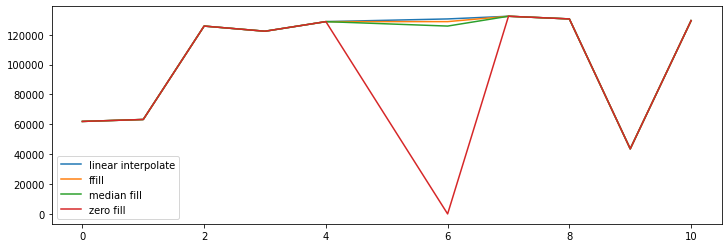

In [101]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 4))

plt.plot(df.salary.interpolate(method='linear', axis=0), label='linear interpolate')
plt.plot(df.salary.fillna(method='ffill'), label='ffill')
plt.plot(df.salary.fillna(df.salary.median()), label='median fill')
plt.plot(df.salary.fillna(0), label='zero fill')

plt.legend();